In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [34]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/Gau_1.5_edit'
files = sorted(os.listdir(filePath))
orig_file = filePath+'/'+'orig.txt'

In [35]:
files

['Vyas',
 'full_N1_with_adv_not_removed.txt',
 'full_N2_with_adv_not_removed.txt',
 'full_N3_with_adv_not_removed.txt',
 'full_N4_with_adv_not_removed.txt',
 'full_N5_with_adv_not_removed.txt',
 'full_N6_with_adv_not_removed.txt',
 'full_N7_with_adv_not_removed.txt',
 'full_N8_with_adv_not_removed.txt',
 'full_N9_with_adv_not_removed.txt',
 'orig.txt']

In [14]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

# Orig
f = open(orig_file)
lines = f.readlines()[-3:]
length.append(0)
zero_edits.append(float(lines[0][61:].replace('\n','')))
sub_value = lines[1].split(' ')
orig_mean.append(float(sub_value[3].replace('\t','')))
orig_std.append(float(sub_value[5].replace('\n','')))
sub_value = lines[2].split(' ')
adv_mean.append(float(sub_value[3].replace('\t','')))
adv_std.append(float(sub_value[5].replace('\n','')))


for file in files:
    if 'Vyas' in file or 'orig' in file:
        continue
    length.append(int(file[6]))
    f = open(filePath + '/' + file)
    lines = f.readlines()[-3:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
    sub_value = lines[1].split(' ')
    orig_mean.append(float(sub_value[3].replace('\t','')))
    orig_std.append(float(sub_value[5].replace('\n','')))
    sub_value = lines[2].split(' ')
    adv_mean.append(float(sub_value[3].replace('\t','')))
    adv_std.append(float(sub_value[5].replace('\n','')))

data = {'length':length,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'orig std':orig_std,
       'adv mean':adv_mean,
       'adv std':adv_std}
df = pd.DataFrame(data)
df

,length,zero edit rate,orig mean,orig std,adv mean,adv std
0,0,0.384784,1.397220,1.722690,0.000000,0.000000
1,1,0.433797,1.160205,1.593280,0.085955,0.280348
2,2,0.465984,1.086686,1.591283,0.068764,0.271242
3,3,0.471105,1.049378,1.488378,0.078639,0.281190
4,4,0.493416,1.029993,1.500035,0.044623,0.225161
5,5,0.512436,0.983175,1.485289,0.058522,0.258508
6,6,0.472933,0.972568,1.473382,0.161668,0.397827
7,7,0.530358,0.949159,1.512230,0.055962,0.259780
8,8,0.527432,0.955011,1.481125,0.070227,0.329386
9,9,0.514996,0.922092,1.479511,0.126189,0.379431


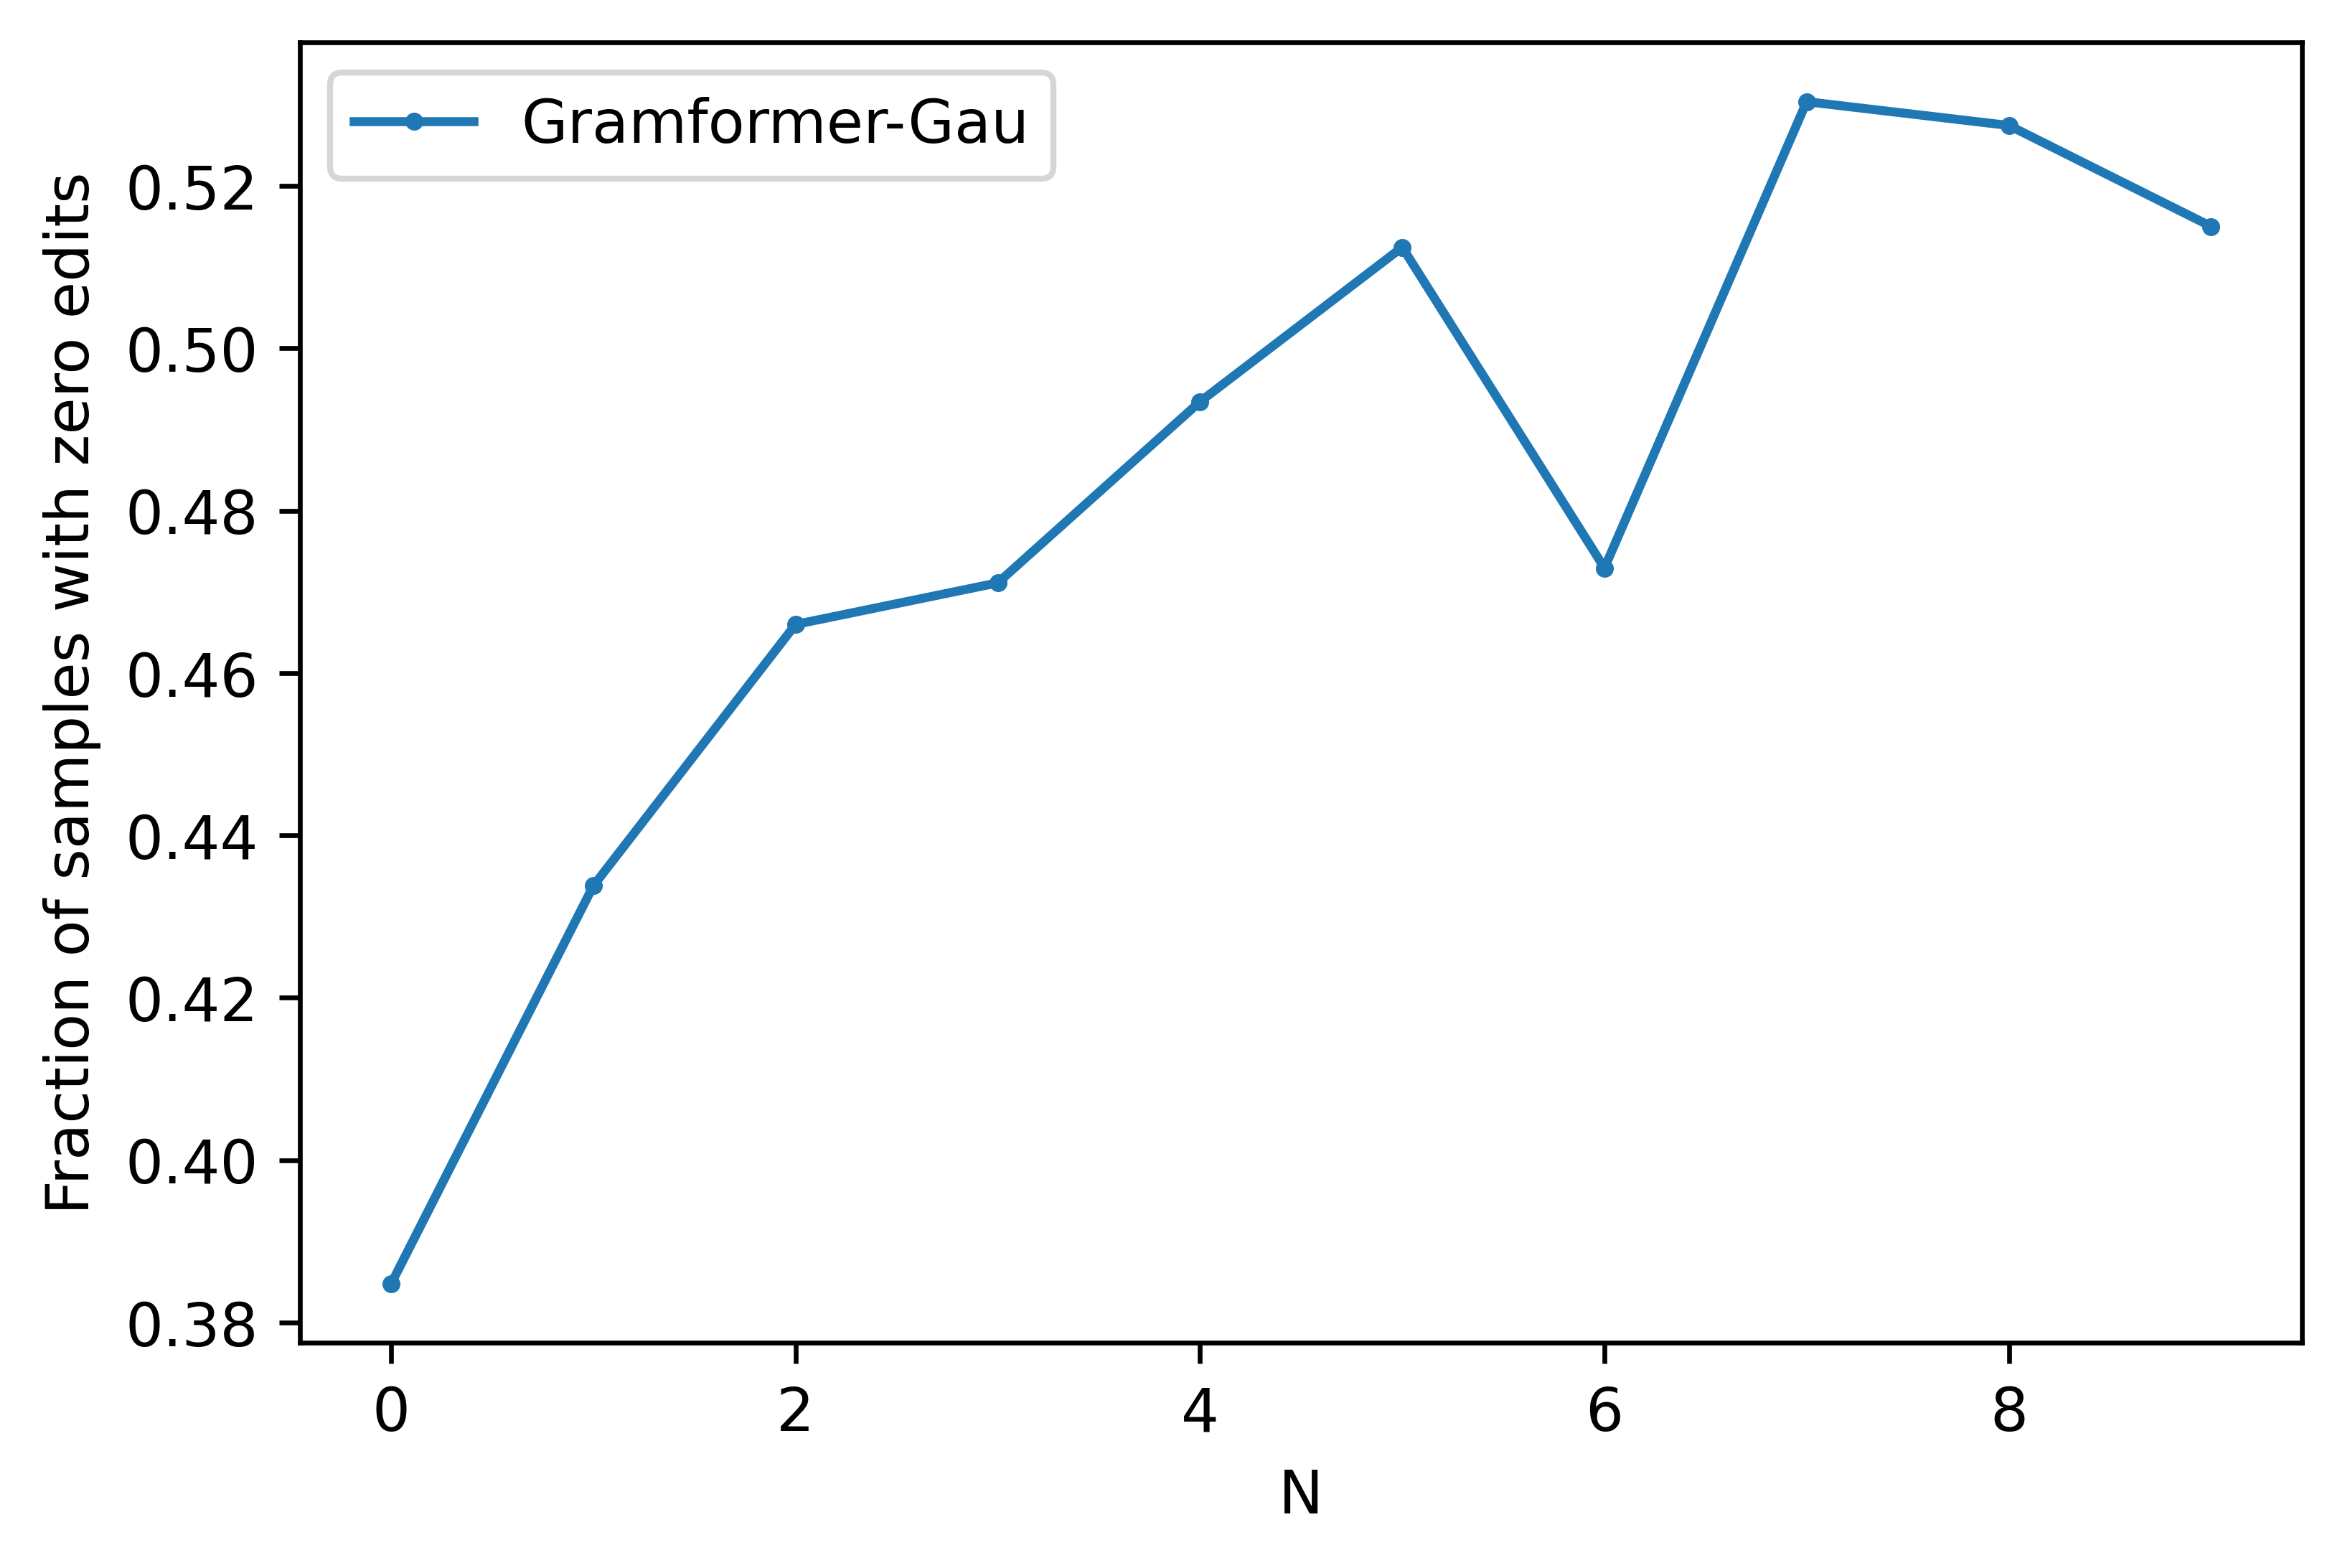

In [15]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)

ax.plot(df['length'], df['zero edit rate'], marker='o',markersize=2,label='Gramformer-Gau') # 作y1 = x 图，并标记此线名为linear
ax.set_xlabel('N') #设置x轴名称 x label
ax.set_ylabel('Fraction of samples with zero edits') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


In [16]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/Gau_1.5_edit/Vyas'
files = sorted(os.listdir(filePath))
orig_file = filePath+'/no_attack.txt'

In [20]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

# Orig
f = open(orig_file)
lines = f.readlines()[-1]
length.append(0)
zero_edits.append(float(lines[61:].replace('\n','')))


for file in files:
    if 'beam' not in file:
        break
    length.append(int(file[7]))
    f = open(filePath + '/' + file)
    lines = f.readlines()[-1:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
orig_mean = [1.41,1.08,1.00,0.99,0.94,0.90,0.88,0.89,0.90,0.91]
adv_mean = [0.00, 0.06, 0.04, 0.05, 0.03, 0.04, 0.04, 0.06, 0.04, 0.04]
data = {'length':length,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'adv mean':adv_mean}
df_v = pd.DataFrame(data)
df_v

,length,zero edit rate,orig mean,adv mean
0,0,0.383321,1.41,0.00
1,1,0.468544,1.08,0.06
2,2,0.500366,1.00,0.04
3,3,0.511704,0.99,0.05
4,4,0.524872,0.94,0.03
5,5,0.531456,0.90,0.04
6,6,0.539137,0.88,0.04
7,7,0.544257,0.89,0.06
8,8,0.548281,0.90,0.04
9,9,0.555230,0.91,0.04


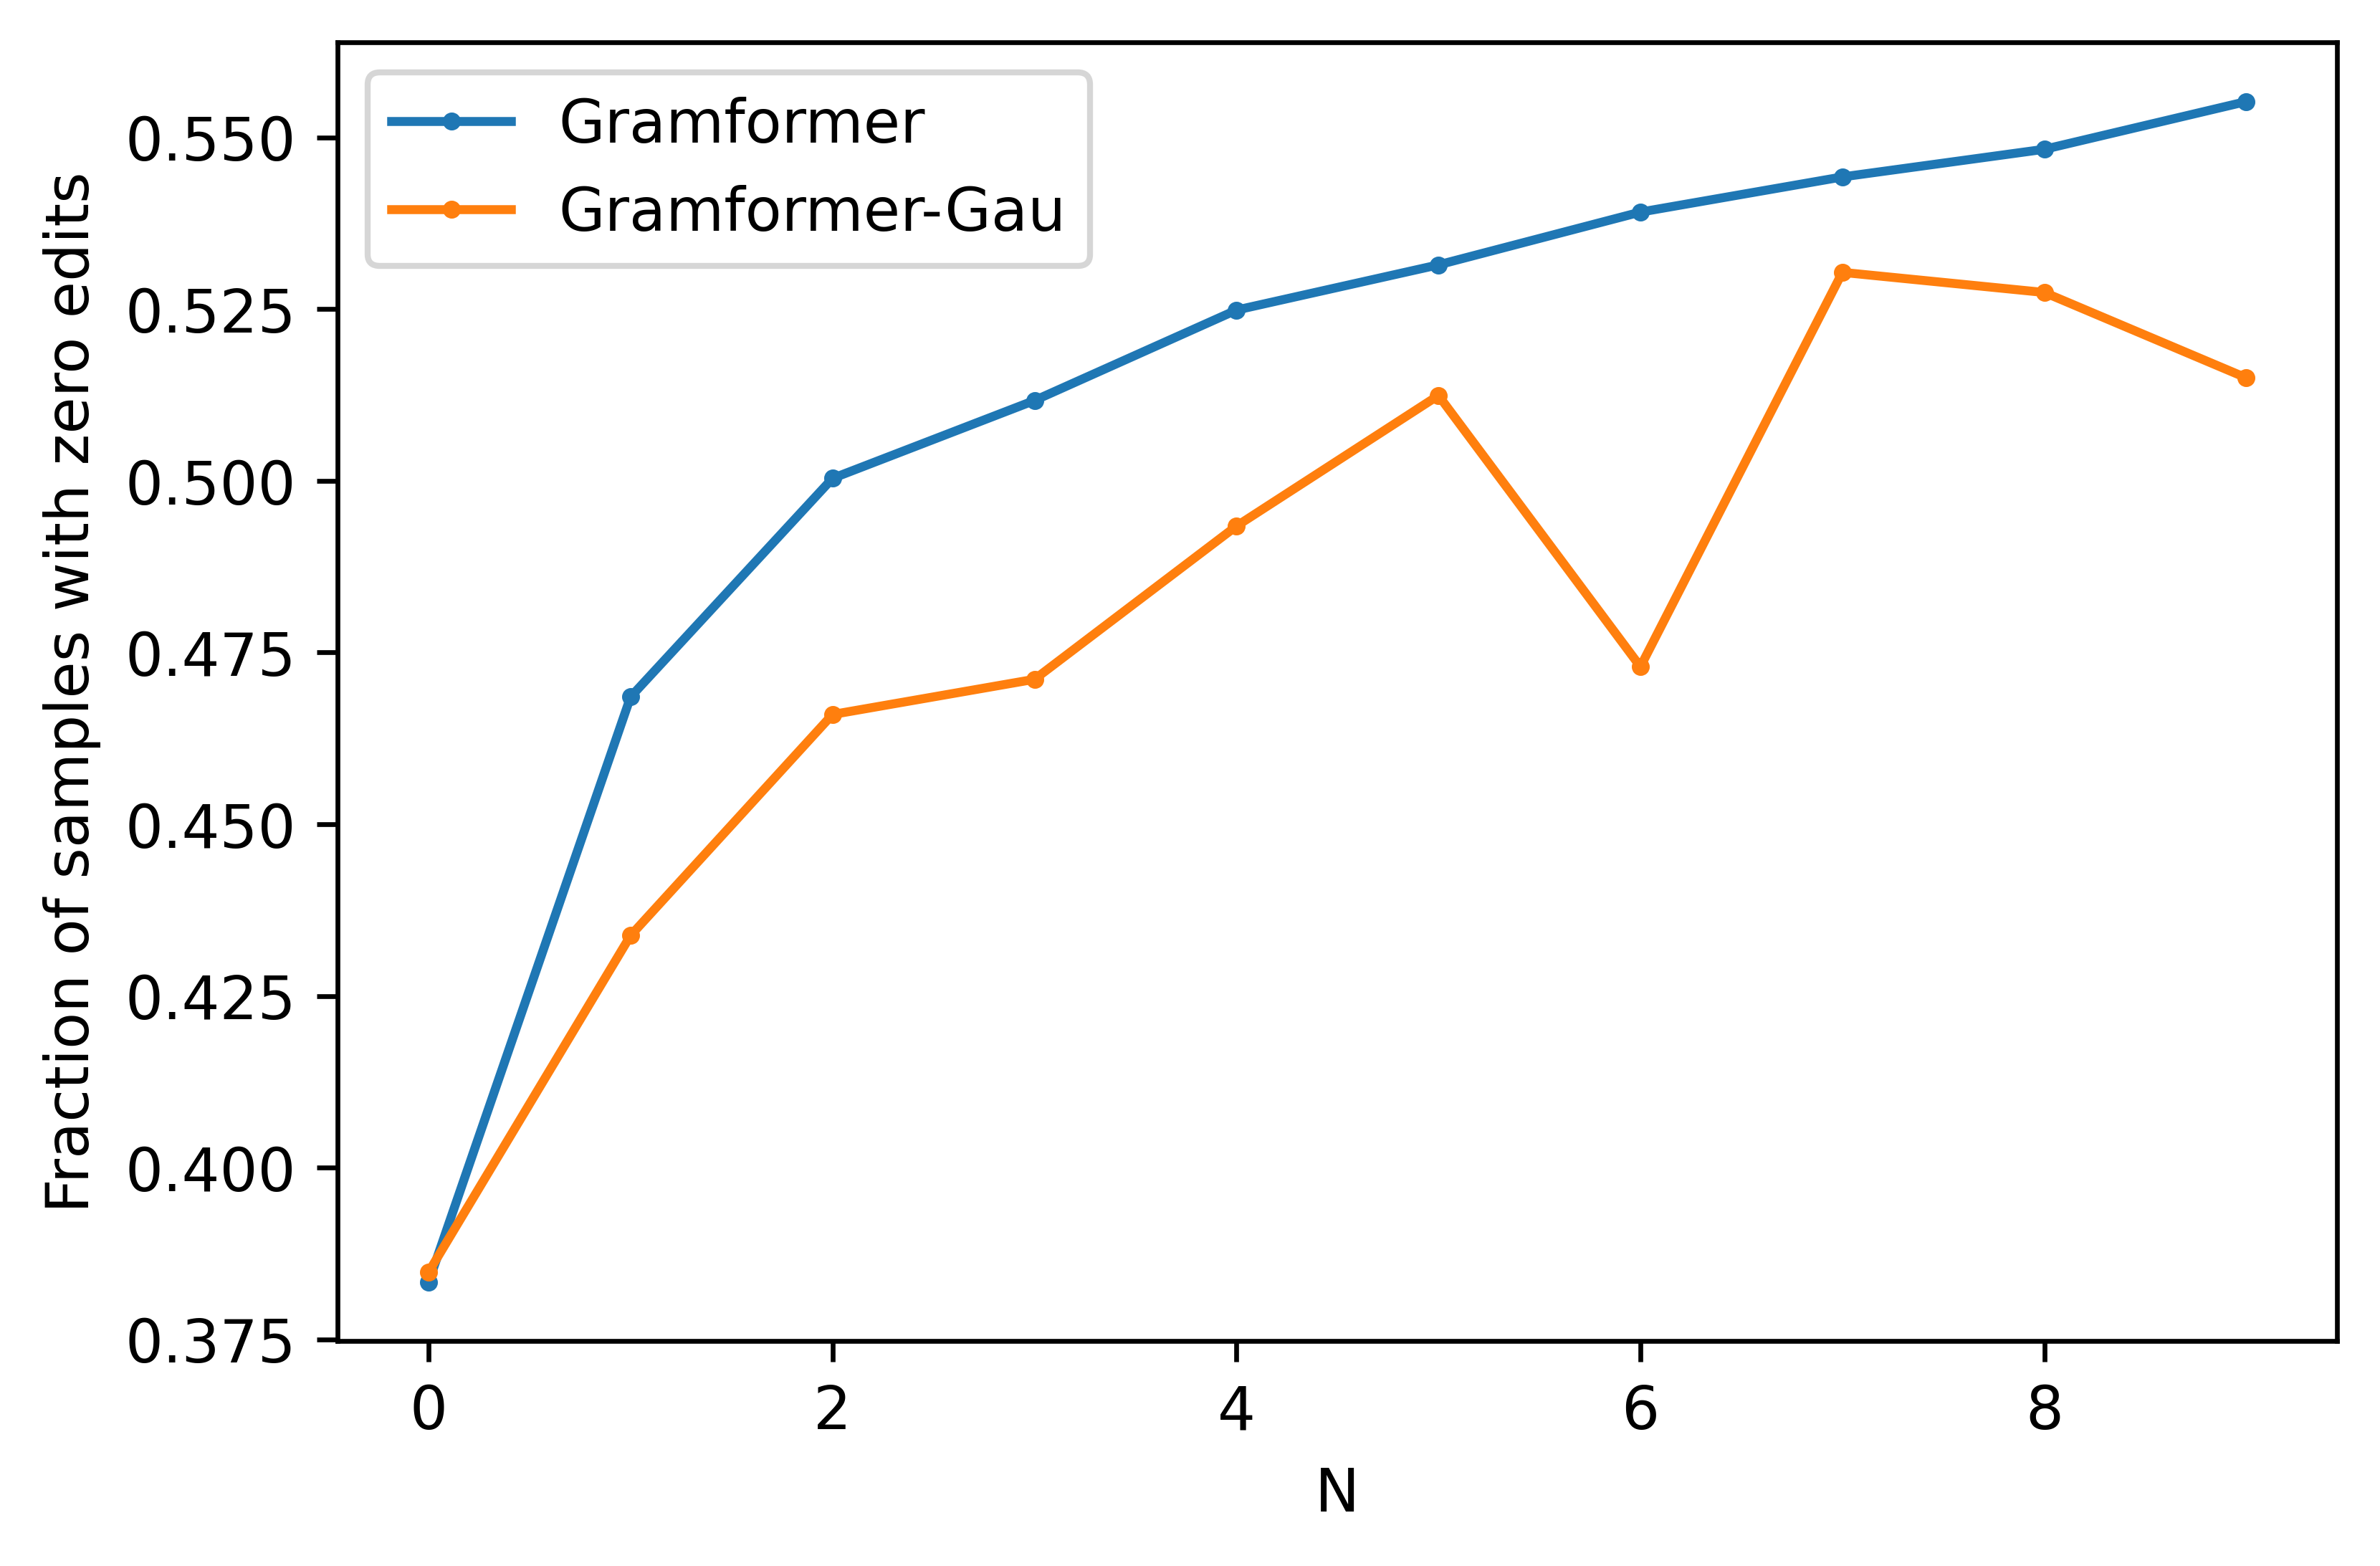

In [21]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)
ax.plot(df_v['length'], df_v['zero edit rate'], marker='o',markersize=2,label='Gramformer') # 作y1 = x 图，并标记此线名为linear
ax.plot(df['length'], df['zero edit rate'], marker='o',markersize=2,label='Gramformer-Gau') # 作y1 = x 图，并标记此线名为linear
ax.set_xlabel('N') #设置x轴名称 x label
ax.set_ylabel('Fraction of samples with zero edits') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


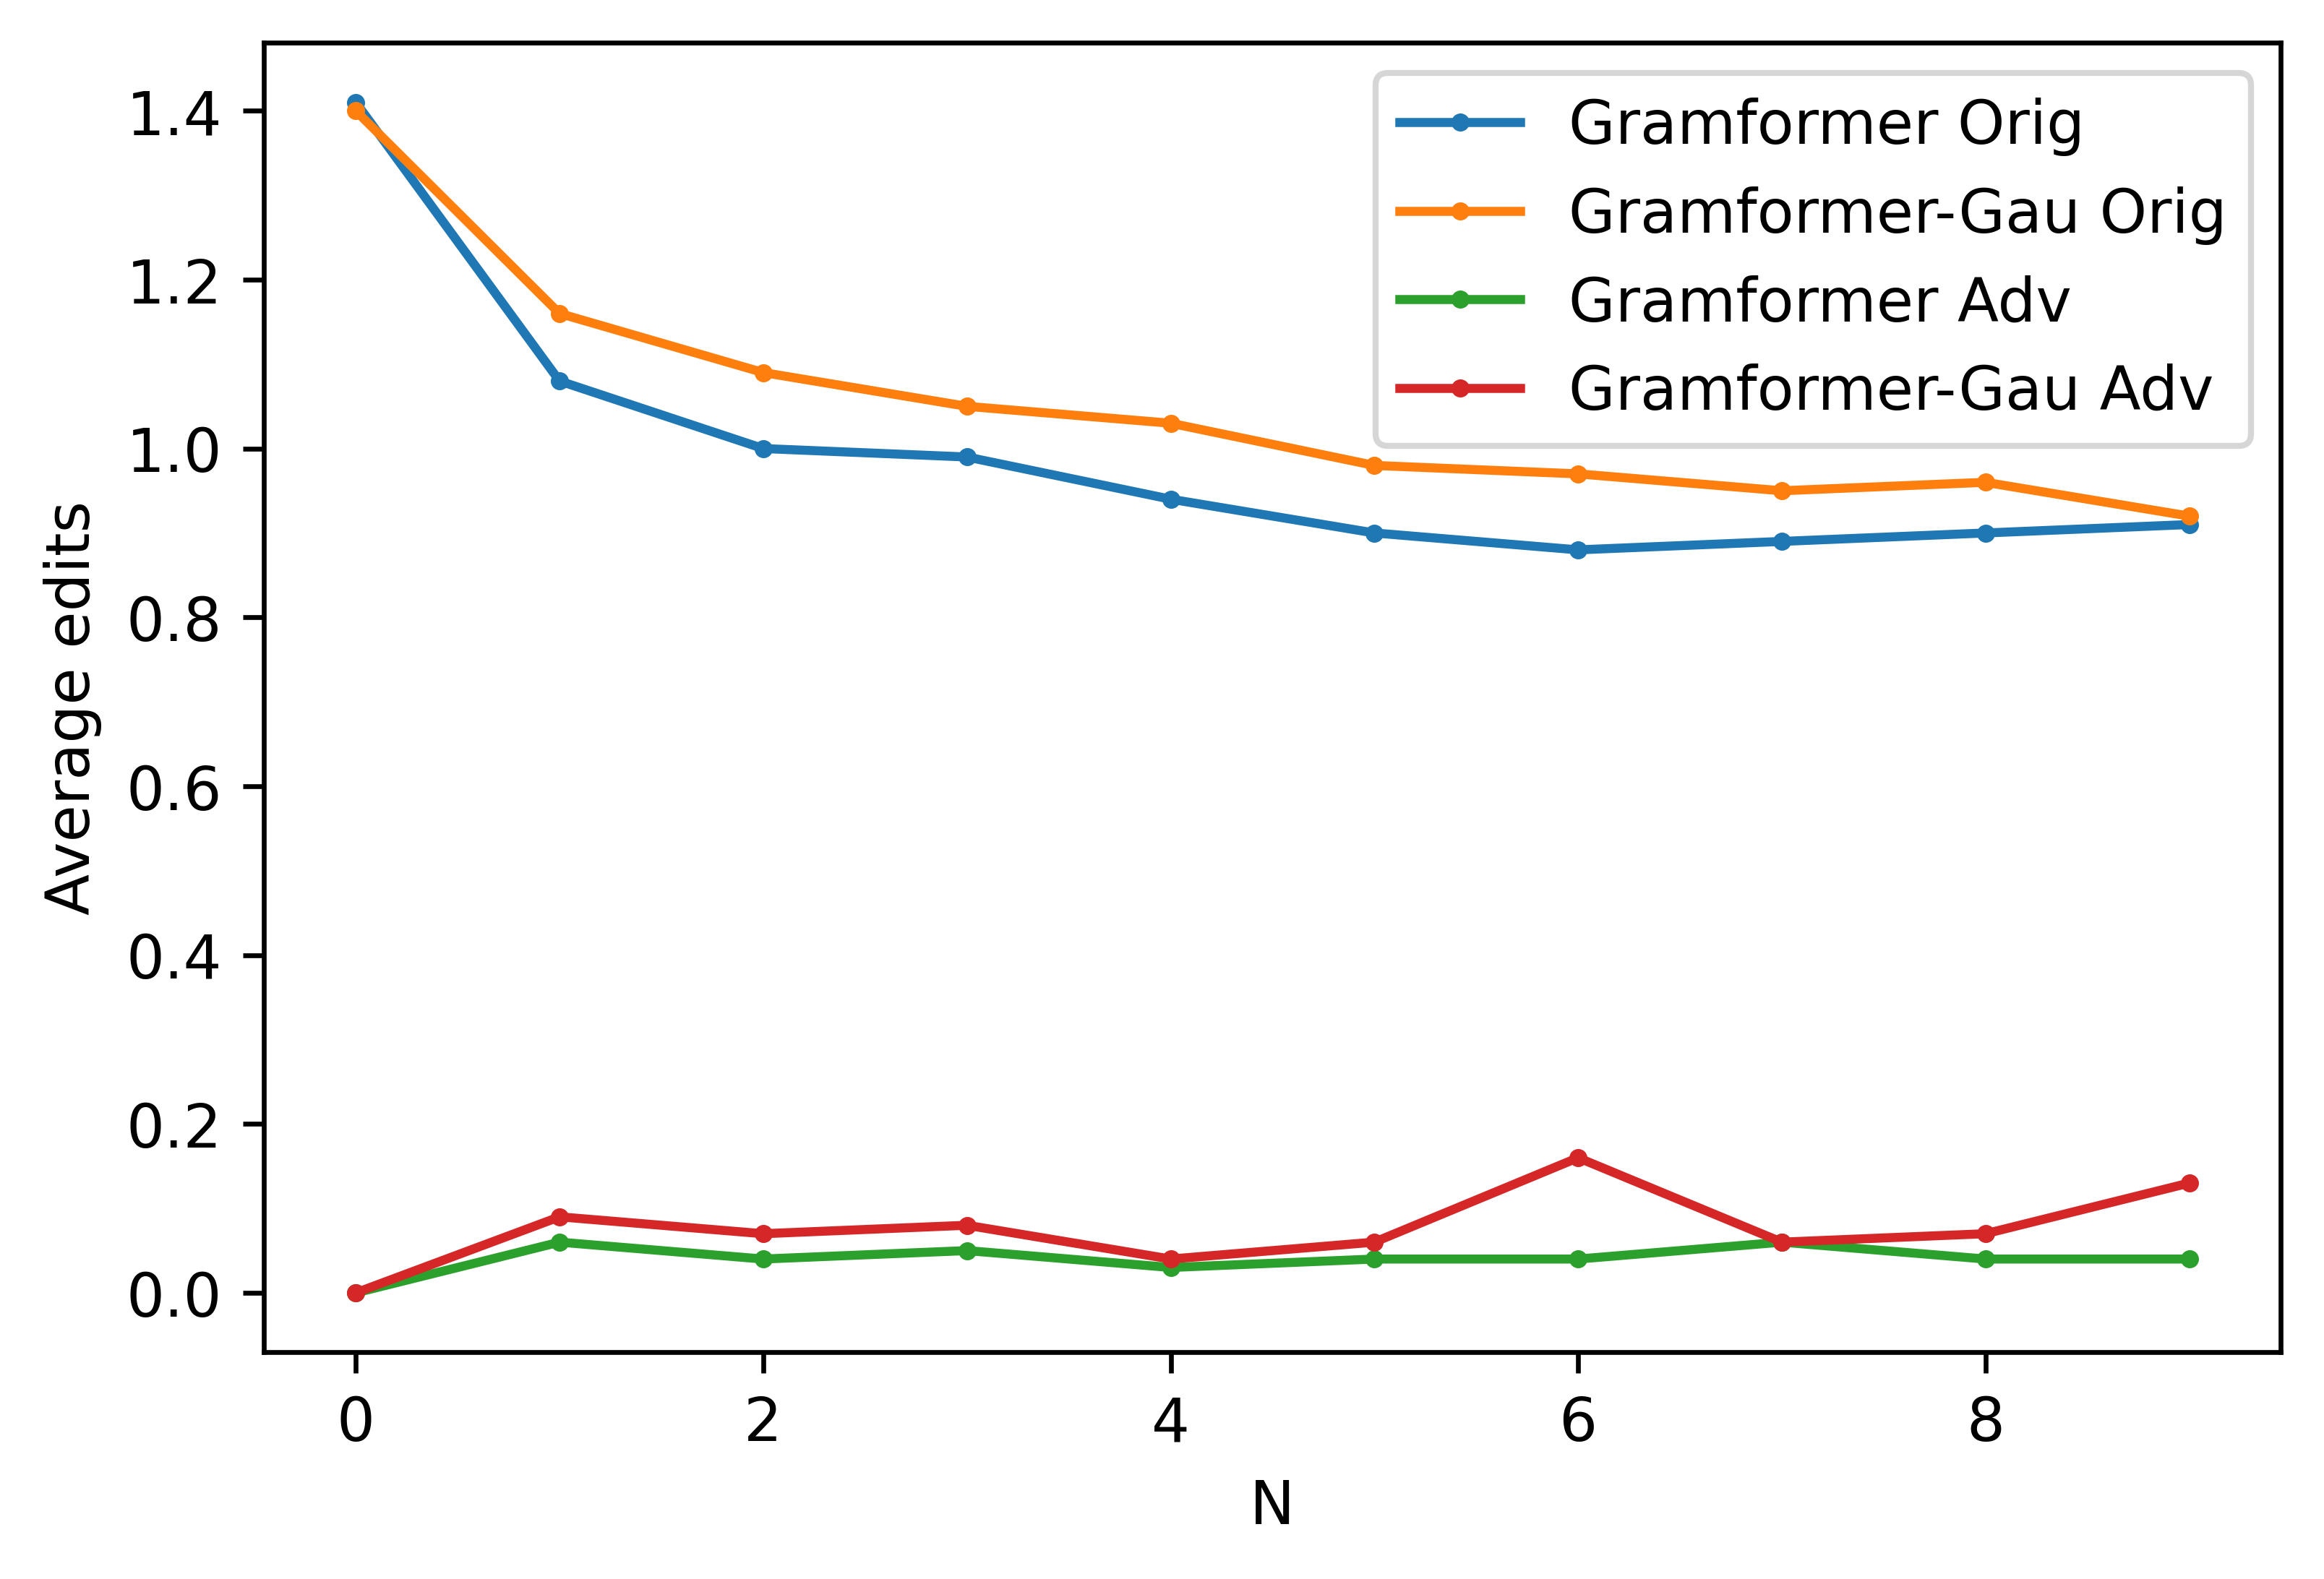

In [24]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)
ax.plot(df_v['length'], df_v['orig mean'].round(2), marker='o',markersize=2,label='Gramformer Orig') # 作y1 = x 图，并标记此线名为linear
ax.plot(df['length'], df['orig mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Orig') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_v['length'], df_v['adv mean'].round(2), marker='o',markersize=2,label='Gramformer Adv') # 作y1 = x 图，并标记此线名为linear
ax.plot(df['length'], df['adv mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Adv') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('N') #设置x轴名称 x label
ax.set_ylabel('Average edits ') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


In [37]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/Gau_0.1_edit'
files = sorted(os.listdir(filePath))
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

# Orig
f = open(orig_file)
lines = f.readlines()[-3:]
length.append(0)
zero_edits.append(float(lines[0][61:].replace('\n','')))
sub_value = lines[1].split(' ')
orig_mean.append(float(sub_value[3].replace('\t','')))
orig_std.append(float(sub_value[5].replace('\n','')))
sub_value = lines[2].split(' ')
adv_mean.append(float(sub_value[3].replace('\t','')))
adv_std.append(float(sub_value[5].replace('\n','')))


for file in files:
    if 'Vyas' in file or 'orig' in file:
        continue
    length.append(int(file[6]))
    f = open(filePath + '/' + file)
    lines = f.readlines()[-3:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
    sub_value = lines[1].split(' ')
    orig_mean.append(float(sub_value[3].replace('\t','')))
    orig_std.append(float(sub_value[5].replace('\n','')))
    sub_value = lines[2].split(' ')
    adv_mean.append(float(sub_value[3].replace('\t','')))
    adv_std.append(float(sub_value[5].replace('\n','')))

data = {'length':length,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'orig std':orig_std,
       'adv mean':adv_mean,
       'adv std':adv_std}
df_2 = pd.DataFrame(data)
df_2

,length,zero edit rate,orig mean,orig std,adv mean,adv std
0,0,0.384784,1.397220,1.722690,0.000000,0.000000
1,1,0.435260,1.168252,1.579299,0.080102,0.271501
2,2,0.465984,1.104974,1.549155,0.053036,0.233735
3,3,0.473665,1.095830,1.570270,0.040600,0.199242
4,4,0.479151,1.063643,1.524399,0.035479,0.198382
5,5,0.496708,1.038771,1.535039,0.042063,0.219905
6,6,0.504023,1.018288,1.532080,0.042794,0.224703
7,7,0.508413,0.989759,1.478435,0.052670,0.261169
8,8,0.504023,1.055596,1.634063,0.051573,0.298630
9,9,0.502560,1.013899,1.515075,0.044257,0.227657


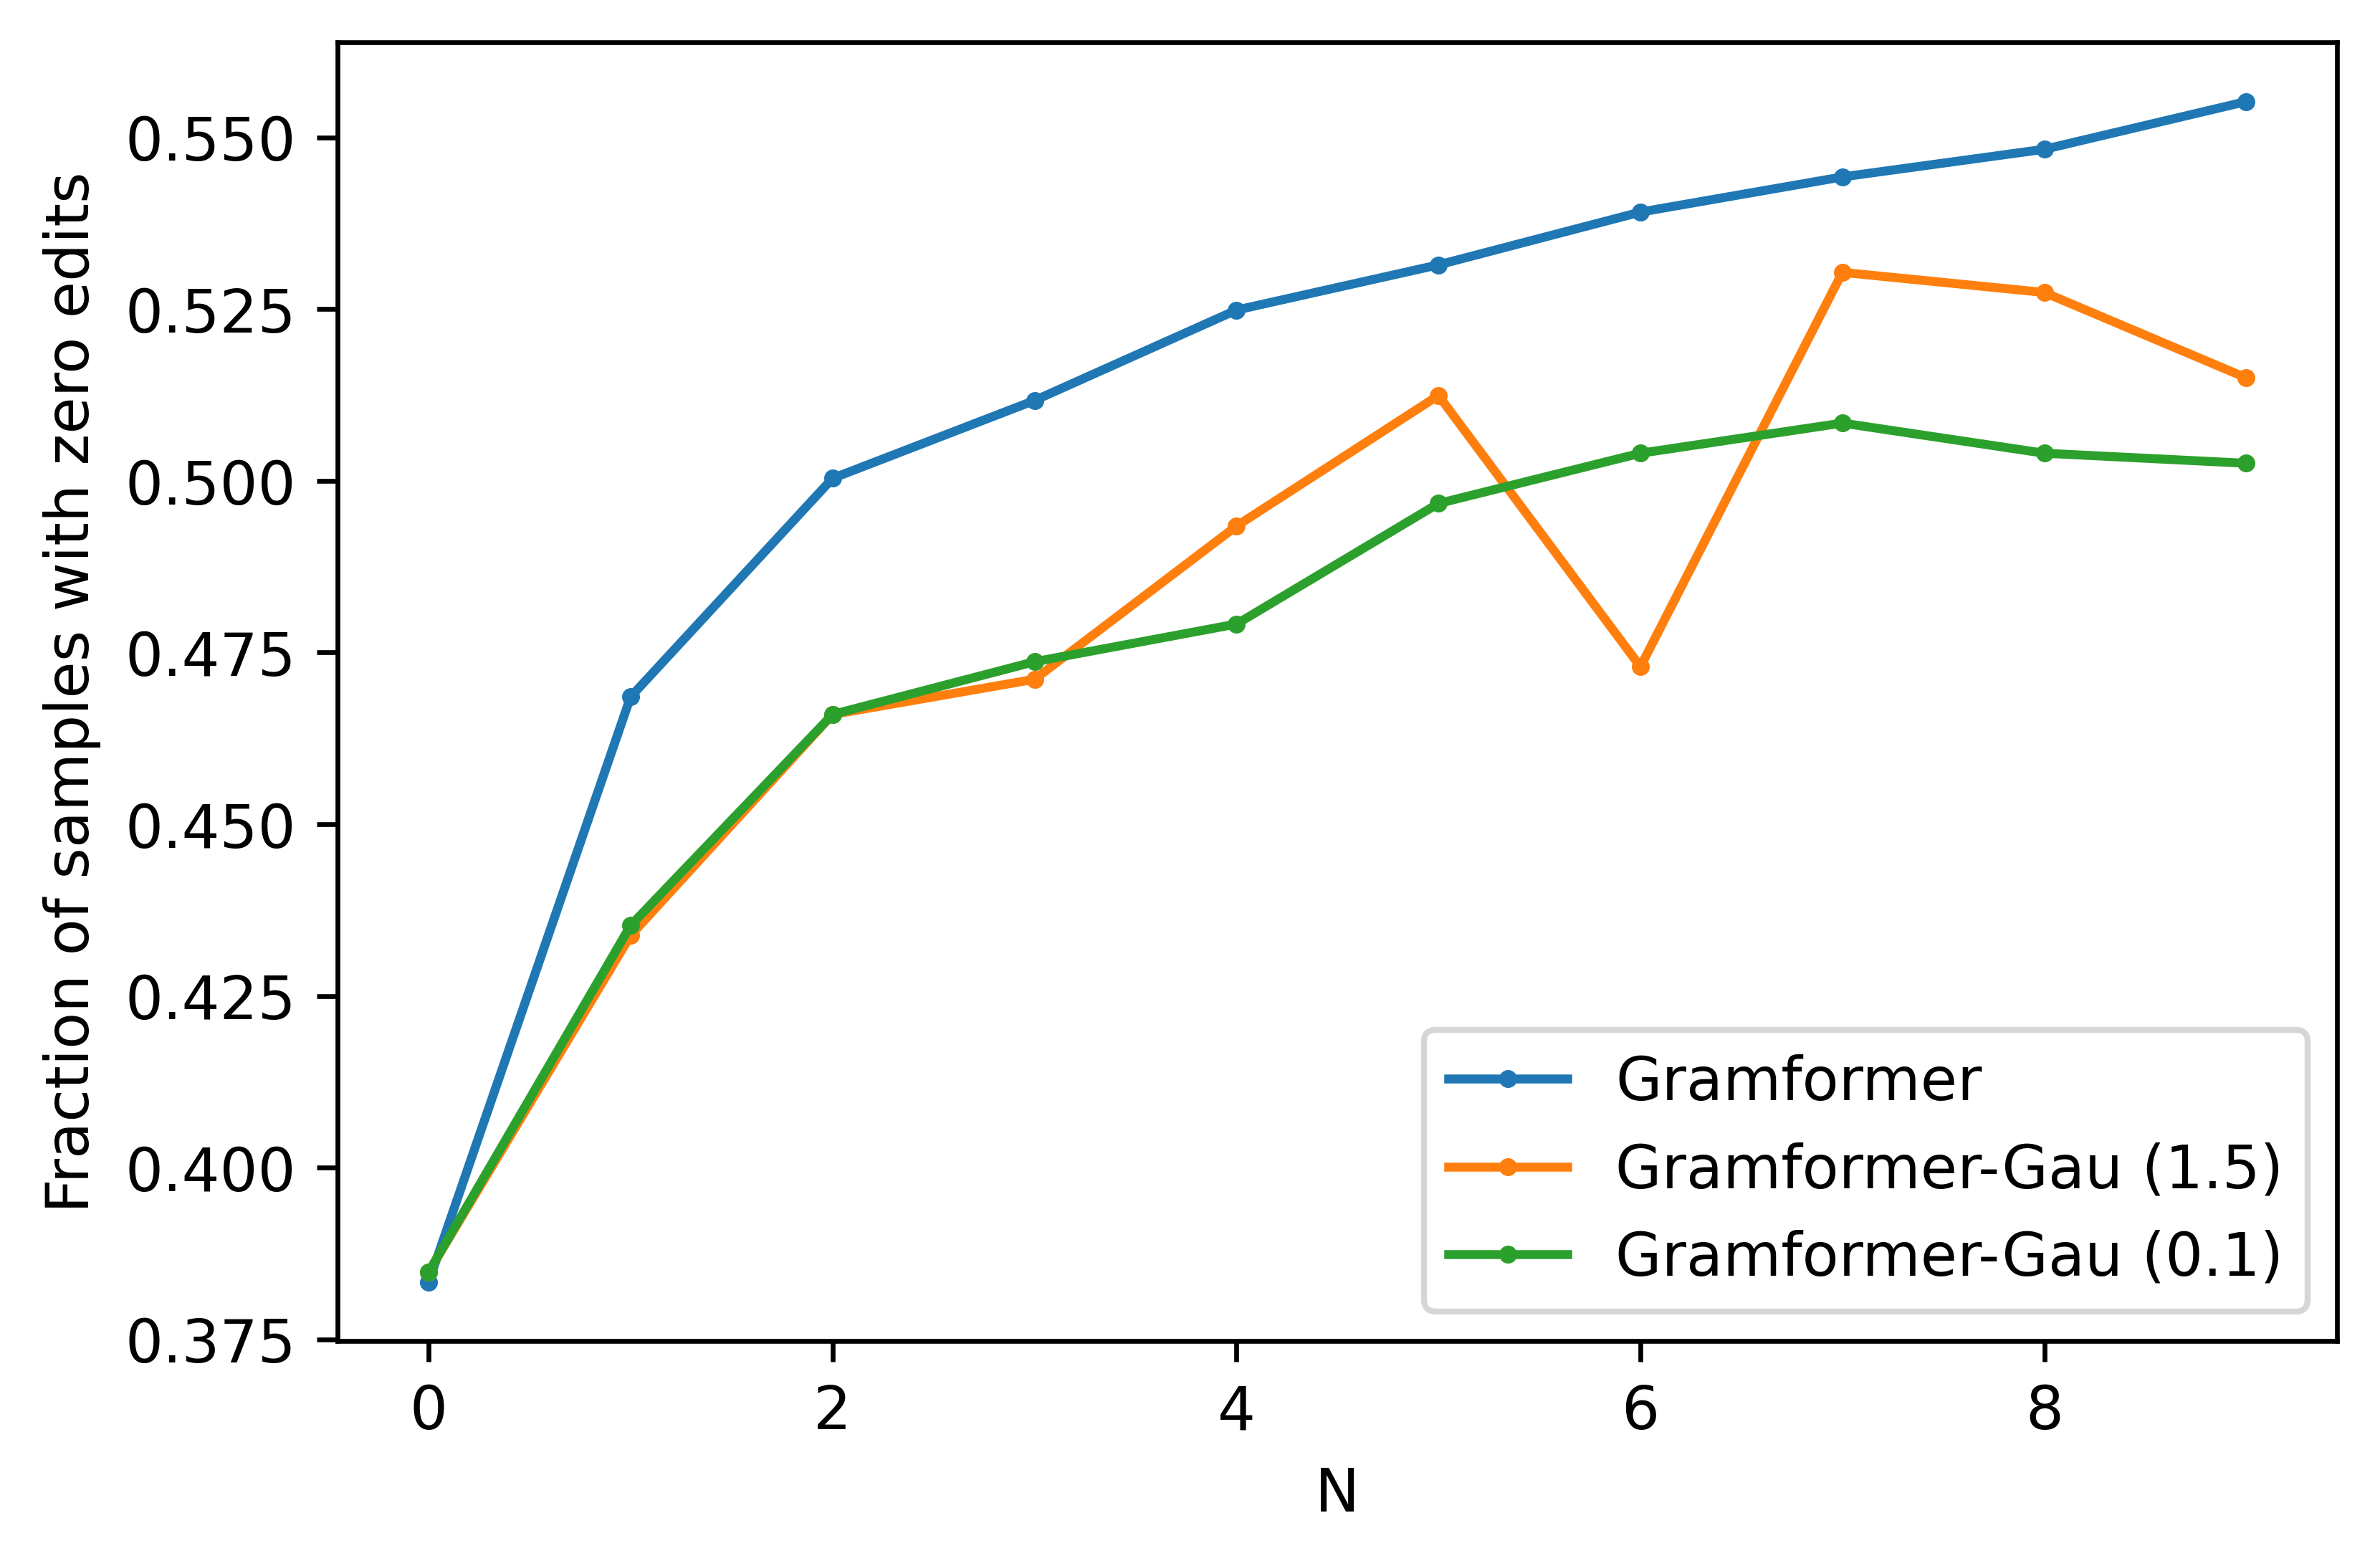

In [39]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)
ax.plot(df_v['length'], df_v['zero edit rate'], marker='o',markersize=2,label='Gramformer') # 作y1 = x 图，并标记此线名为linear
ax.plot(df['length'], df['zero edit rate'], marker='o',markersize=2,label='Gramformer-Gau (1.5)') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_2['length'], df_2['zero edit rate'], marker='o',markersize=2,label='Gramformer-Gau (0.1)') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('N') #设置x轴名称 x label
ax.set_ylabel('Fraction of samples with zero edits') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


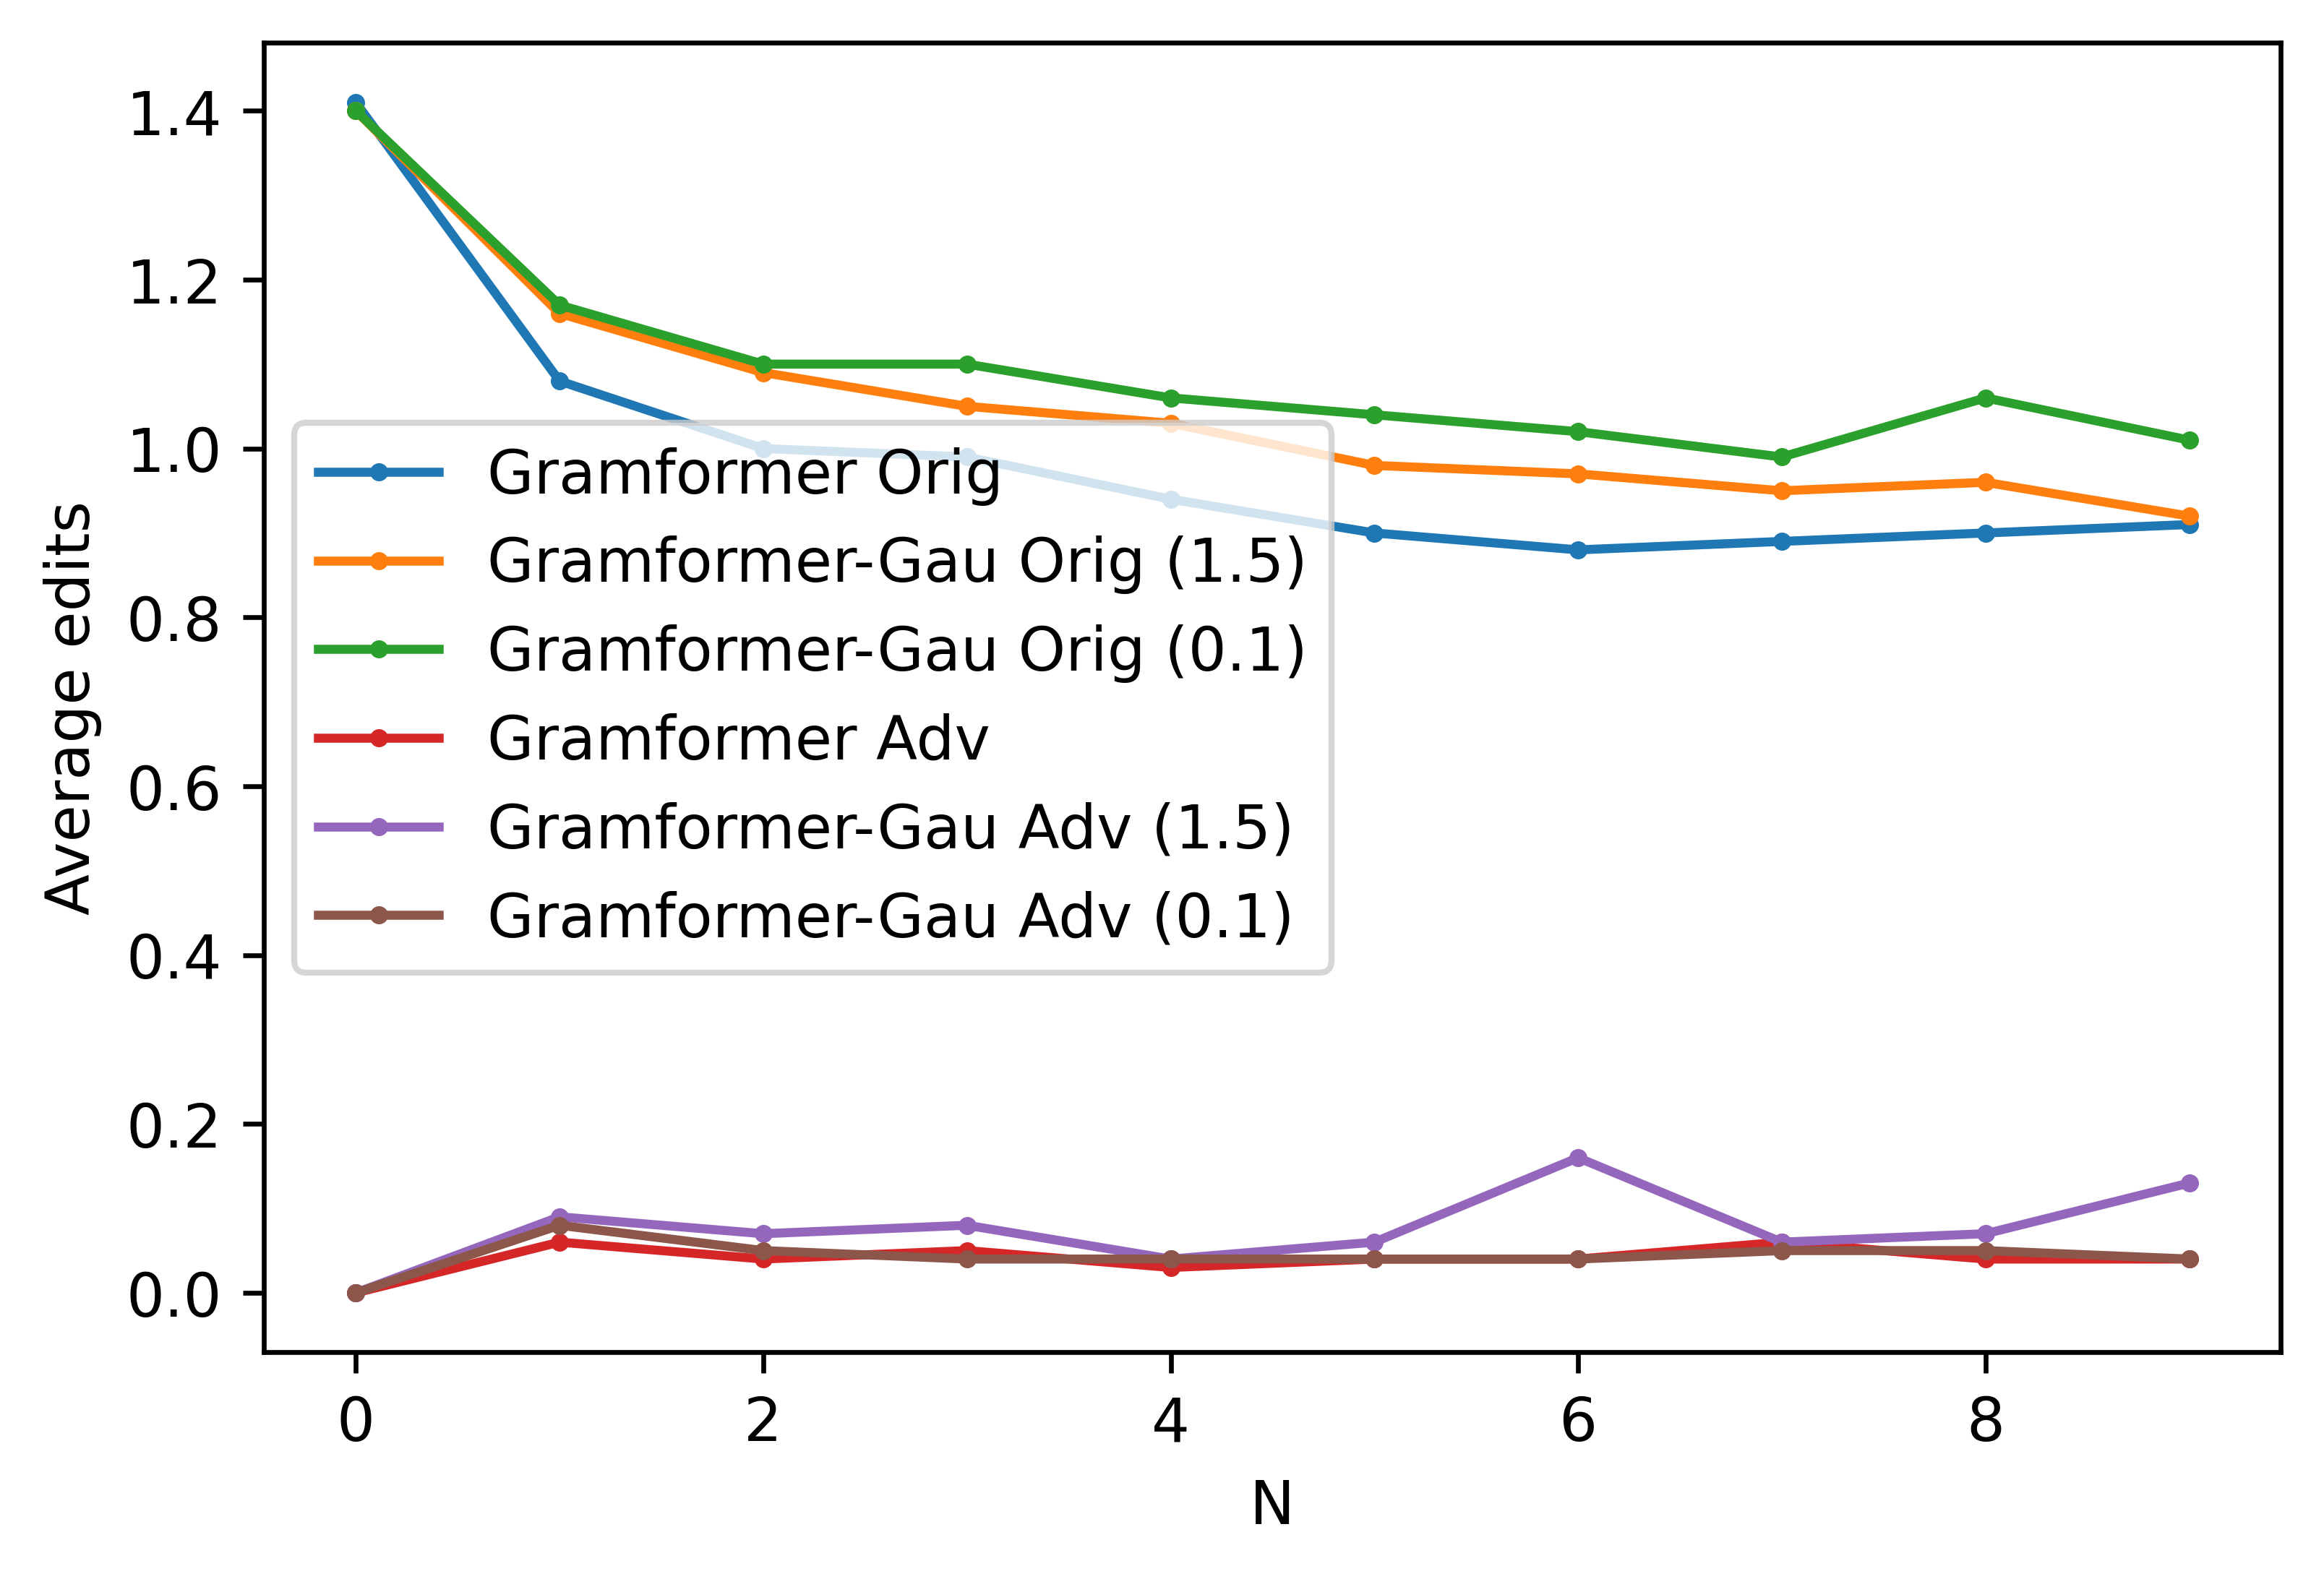

In [40]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)
ax.plot(df_v['length'], df_v['orig mean'].round(2), marker='o',markersize=2,label='Gramformer Orig') # 作y1 = x 图，并标记此线名为linear
ax.plot(df['length'], df['orig mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Orig (1.5)') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_2['length'], df_2['orig mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Orig (0.1)') # 作y1 = x 图，并标记此线名为linear

ax.plot(df_v['length'], df_v['adv mean'].round(2), marker='o',markersize=2,label='Gramformer Adv') # 作y1 = x 图，并标记此线名为linear
ax.plot(df['length'], df['adv mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Adv (1.5)') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_2['length'], df_2['adv mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Adv (0.1)') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('N') #设置x轴名称 x label
ax.set_ylabel('Average edits ') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化
